In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 1. Import rollingsales_manhattan.csv as a DataFrame


In [199]:
df = pd.read_csv('../data/raw/rollingsales_manhattan.csv')
df.columns = df.iloc[3]
df=df.iloc[4:].reset_index()
del df['index']
df = df.dropna(how='all')
df.columns.name = None
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6TH STREET,NaN,...,1,1,2,"2,090","3,680",1940,1,S1,"3,200,000",7/24/19
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,NaN,A4,526 EAST 5TH STREET,NaN,...,1,0,1,"1,883","5,200",1900,1,A4,"6,100,000",12/3/18
2,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,...,2,0,2,"1,510","4,520",1900,1,B9,0,7/22/19
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,...,2,0,2,"1,510","4,520",1900,1,B9,0,11/29/18
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,...,2,0,2,"1,510","4,520",1900,1,B9,0,11/29/18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17154,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2174,97,NaN,V1,N/A NAGLE AVENUE,NaN,...,NaN,NaN,NaN,"2,800",NaN,0,4,V1,"15,000",6/12/19
17155,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2179,153,NaN,V1,203 CABRINI BOULEVARD,NaN,...,NaN,NaN,NaN,"1,928",NaN,0,4,V1,"3,000,000",9/4/18
17156,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2179,154,NaN,V1,205 CABRINI BOULEVARD,NaN,...,NaN,NaN,NaN,"1,775",NaN,0,4,V1,0,9/4/18
17157,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2179,155,NaN,V1,207 CABRINI BOULEVARD,NaN,...,NaN,NaN,NaN,"1,555",NaN,0,4,V1,0,9/4/18


* I first made the values in the 3rd row into the column names, since that's what I saw was the value being shown by each row in the respective column
* I then made the entire dataset only equal to all the rows from row 4 and on, reseting the indexing
* I saw that index had become a column itself, so I deleted that too. 
* Finally, There were several dozens of rows in the end of the dataframe that were all NaN columns, so I dropped every row with NaN in every Column

### 2. Display columns and row samples


In [200]:
for i in df.columns:
    print(i)

BOROUGH
NEIGHBORHOOD
BUILDING CLASS CATEGORY
TAX CLASS AT PRESENT
BLOCK
LOT
EASE-MENT
BUILDING CLASS AT PRESENT
ADDRESS
APARTMENT NUMBER
ZIP CODE
RESIDENTIAL UNITS
COMMERCIAL UNITS
TOTAL UNITS
LAND SQUARE FEET
GROSS SQUARE FEET
YEAR BUILT
TAX CLASS AT TIME OF SALE
BUILDING CLASS AT TIME OF SALE
 SALE PRICE 
SALE DATE


In [201]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6TH STREET,NaN,...,1,1,2,"2,090","3,680",1940,1,S1,"3,200,000",7/24/19
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,NaN,A4,526 EAST 5TH STREET,NaN,...,1,0,1,"1,883","5,200",1900,1,A4,"6,100,000",12/3/18
2,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,...,2,0,2,"1,510","4,520",1900,1,B9,0,7/22/19
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,...,2,0,2,"1,510","4,520",1900,1,B9,0,11/29/18
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,...,2,0,2,"1,510","4,520",1900,1,B9,0,11/29/18


In [202]:
df.sample(n = 5) 

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
16390,1,UPPER WEST SIDE (96-116),07 RENTALS - WALKUP APARTMENTS,2A,1889,28,NaN,C5,320 WEST 101 STREET,NaN,...,4,0,4,"1,716","5,641",1910,2,C5,"7,100,000",5/31/19
8586,1,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,2,1042,1116,NaN,R4,"310 WEST 52ND STREET, 5A",5A,...,NaN,NaN,NaN,NaN,823,2005,2,R4,"1,136,000",1/4/19
10524,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,222,1214,NaN,R4,443 GREENWICH STREET,2F,...,NaN,NaN,NaN,NaN,"2,770",1905,2,R4,"5,759,658",10/4/18
15563,1,UPPER WEST SIDE (79-96),08 RENTALS - ELEVATOR APARTMENTS,2,1235,7,NaN,D3,"269 WEST 87 STREET, 12A",NaN,...,26,0,26,"10,070","117,575",2018,2,D3,"11,509,225",3/27/19
4973,1,HARLEM-CENTRAL,44 CONDO PARKING,4,1724,1031,NaN,RG,50 WEST 127 STREET,P8,...,NaN,NaN,NaN,NaN,128,0,4,RG,0,11/2/18


In [203]:
df.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
17154,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2174,97,NaN,V1,N/A NAGLE AVENUE,NaN,...,NaN,NaN,NaN,"2,800",NaN,0,4,V1,"15,000",6/12/19
17155,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2179,153,NaN,V1,203 CABRINI BOULEVARD,NaN,...,NaN,NaN,NaN,"1,928",NaN,0,4,V1,"3,000,000",9/4/18
17156,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2179,154,NaN,V1,205 CABRINI BOULEVARD,NaN,...,NaN,NaN,NaN,"1,775",NaN,0,4,V1,0,9/4/18
17157,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2179,155,NaN,V1,207 CABRINI BOULEVARD,NaN,...,NaN,NaN,NaN,"1,555",NaN,0,4,V1,0,9/4/18
17158,1,WASHINGTON HEIGHTS UPPER,44 CONDO PARKING,4,2180,1222,NaN,RG,736 WEST 187 STREET,PRK22,...,NaN,NaN,NaN,NaN,160,2003,4,RG,0,9/13/18


### 3. Describe the rows and data types


In [204]:
print('Column Data Types:\n',df.dtypes, "\n")
print('\nNaN Counts per Column\n',df.isna().sum())

Column Data Types:
 BOROUGH                           object
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                             object
LOT                               object
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                          object
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                  object
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                        object
TAX CLASS AT TIME OF SALE         object
BUILDING CLASS AT TIME OF SALE    object
 SALE PRICE                       object
SALE DATE                         object
dtype: object 


NaN Counts per Column
 BOROUGH                               0
NEIGHBORHOOD                          0

* Every column type is an object, I think we'll need to change those and I'll do so below

Borough:int64
   
Block: int64
 
Lot: int64
  
Zip Code: int64 this will have to be a float64 because it contains NaN's
 
Residential Units: int64
 
Commercial Units: int64

Total Units: int64
 
Land Square Feet: int64
 
Gross Square Feet: int64
 
Year Built: int64
  
SALE PRICE: int64 (get rid of commas)
 

In [205]:
df.replace(',','', regex=True, inplace=True)

### 4. Initial column (or row) clean-up
* I believe we can drop Borough, because they're all 1, which is Manhattan, and Ease-ment, which is literally all NaN

In [206]:
print('Unique Values in BOROUGH Column: ',df['BOROUGH'].nunique())
print('Count of NaN values in EASE-MENT equal the total rows in the dataframe = ',df['EASE-MENT'].isna().count()==len(df.index))
df = df.drop(['EASE-MENT', 'BOROUGH'], axis = 1) 

Unique Values in BOROUGH Column:  1
Count of NaN values in EASE-MENT equal the total rows in the dataframe =  True


In [207]:
cols_to_numeric = [' SALE PRICE ', 'LOT', 'ZIP CODE', 'BLOCK', 'RESIDENTIAL UNITS',
                   'YEAR BUILT', 'GROSS SQUARE FEET', 'LAND SQUARE FEET', 'TOTAL UNITS', 'COMMERCIAL UNITS']
for i in cols_to_numeric:
    df[i] = pd.to_numeric(df[i])

* I made the columns in the cols_to_numeric list into numeric values, either int64 or float64 depending on whether or not these columns had NaN values. Object columns remained so because there's no problem working with Objects if they are indeed strings.

In [208]:
df.columns= df.columns.str.lower()
df.columns= df.columns.str.title()

* I'll rename every column into the same name, just lowercase anything BUT the first letter of any word in the column name
### 5. Determine the top three neighborhoods that had the most properties sold (no need to calculate units, the actual number of properties is adequate)


In [209]:
df['Neighborhood'].value_counts().head()

UPPER EAST SIDE (59-79)    1696
UPPER EAST SIDE (79-96)    1629
UPPER WEST SIDE (59-79)    1499
MIDTOWN EAST               1006
UPPER WEST SIDE (79-96)     882
Name: Neighborhood, dtype: int64

### 6. Describe the kind of buildings that were sold

In [210]:
one_family_homes=len(df.loc[df['Building Class Category'] == '01 ONE FAMILY DWELLINGS'].index)
condos=len(df[df['Building Class Category'].str.contains("CONDO")].index)
offices=len(df[df['Building Class Category'].str.contains("OFFICE")].index)
others = len(df.index)-one_family_homes-condos-offices

I first found single family dwellings, any sale with the word CONDO in it, as well as any sale with the word OFFICE

I then simply remove these totals from the larger dataset length, making this number into "others"

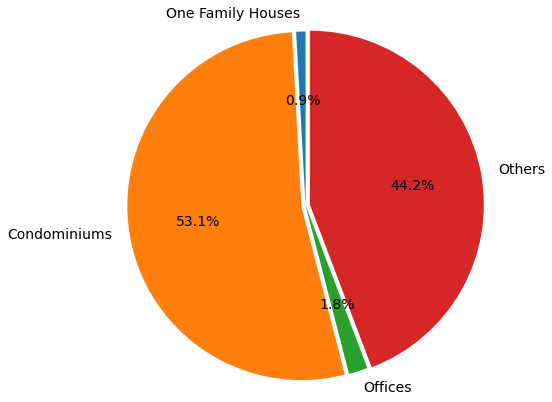

In [211]:
fig1, ax1 = plt.subplots()
figures = [one_family_homes, condos, offices, others]
labels = ['One Family Houses', 'Condominiums', 'Offices', 'Others']
explode = [0,0.05,0,.05]
plt.pie(figures, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, radius=2, textprops={'fontsize': 14})
plt.show()

### 7. Calculate summary statistics for the prices of properties sold for all of Manhattan and for a couple of select neighborhoods


In [212]:
print('Manhattan at large:\nMean Sale Price: $', round(df[' Sale Price '].mean(), 2)
      ,'\nMedian Sale Price: $', df[' Sale Price '].median(),'\n25th Percentile: $', df[' Sale Price '].quantile(.25),
     '\n75th Percentile: $', df[' Sale Price '].quantile(.75), '\nMax Sale Price: $', df[' Sale Price '].max()
     , '\nMin Sale Price: $', df[' Sale Price '].min(),'\n', '-'*20)
greenwich = df.loc[df['Neighborhood']=='GREENWICH VILLAGE-WEST'][' Sale Price ']
harlem = df.loc[df['Neighborhood']=='HARLEM-CENTRAL'][' Sale Price ']
print('Greenwich Village - West:\nMean Sale Price: $', round(greenwich.mean(), 2)
      ,'\nMedian Sale Price: $', greenwich.median(),'\n25th Percentile: $', greenwich.quantile(.25),
     '\n75th Percentile: $', greenwich.quantile(.75), '\nMax Sale Price: $', greenwich.max()
     , '\nMin Sale Price: $', greenwich.min(),'\n', '-'*20)
print('Harlem - Central:\nMean Sale Price: $', round(harlem.mean(), 2)
      ,'\nMedian Sale Price: $', harlem.median(),'\n25th Percentile: $', harlem.quantile(.25),
     '\n75th Percentile: $', harlem.quantile(.75), '\nMax Sale Price: $', harlem.max()
     , '\nMin Sale Price: $', harlem.min(),'\n', '-'*20)
harlem_greenwich =100-(harlem.mean() / greenwich.mean())*100
harlem_manhattan = 100-(harlem.mean() / df[' Sale Price '].mean())*100
greenwich_manhattan =100-(greenwich.mean()/df[' Sale Price '].mean())*100
print('Manhattan Prices are ', round(greenwich_manhattan, 2), '% higher than those in Greenwich')
print('Manhattan Prices are ', round(harlem_manhattan, 2), '% higher than those in Greenwich')

Manhattan at large:
Mean Sale Price: $ 3430214.71 
Median Sale Price: $ 875000.0 
25th Percentile: $ 300000.0 
75th Percentile: $ 2100000.0 
Max Sale Price: $ 2155000000 
Min Sale Price: $ 0 
 --------------------
Greenwich Village - West:
Mean Sale Price: $ 2902521.08 
Median Sale Price: $ 895000.0 
25th Percentile: $ 288000.0 
75th Percentile: $ 2495000.0 
Max Sale Price: $ 129500000 
Min Sale Price: $ 0 
 --------------------
Harlem - Central:
Mean Sale Price: $ 1800244.1 
Median Sale Price: $ 585493.0 
25th Percentile: $ 0.0 
75th Percentile: $ 1420114.75 
Max Sale Price: $ 68806000 
Min Sale Price: $ 0 
 --------------------
Manhattan Prices are  15.38 % higher than those in Greenwich
Manhattan Prices are  47.52 % higher than those in Greenwich


* Manhattan mean sale prices are higher than these two neighborhoods I chose. Manhattan sales are very skeweed to the right, this is seen as the mean price is very far from the median, meaning very few Millions in sales skewed the mean heavily to the right.
* This is also the case for the other two neighborhoods: Greenwich and Harlem. But far starker in Manhattan at large
* You can also read that Harlem Prices are 52.48% less than the Manhattan average, and Greenwich Prices are 84.62% less than the Manhattan average

### 8. Bin the prices of properties sold


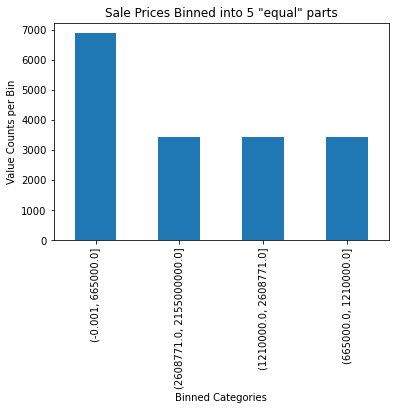

In [213]:
pd.qcut(df[' Sale Price '], q=5, duplicates='drop').value_counts().plot(kind='bar') 
plt.title('Sale Prices Binned into 5 "equal" parts')
plt.xlabel('Binned Categories')
plt.ylabel("Value Counts per Bin")
plt.show()

I assume that the problem is that there are double the values in the first bean as in the rest of the bins. I think the problem lies with the duplicates (A lot of 0's in the dataset). I believe we can sort by index, rank, etc. to get rid of this.

The thousands of 0's in sale prices might distort the mean, but I don't know if they were necessarily an issue because the medians were actually something and not 0. 

There should be 5 bins of equal size, however, the first one eats up the 2nd one or so and distorts the equality property of binning.

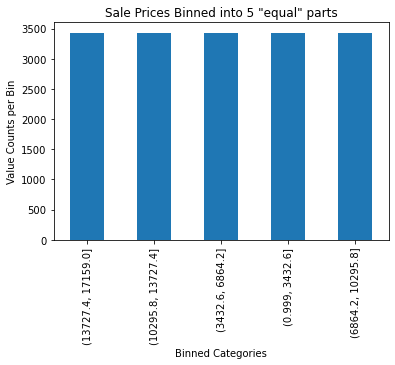

In [214]:
pd.qcut(df[' Sale Price '].rank(method='first'), q=5, duplicates='drop').value_counts().plot(kind='bar') 
plt.title('Sale Prices Binned into 5 "equal" parts')
plt.xlabel('Binned Categories')
plt.ylabel("Value Counts per Bin")
plt.show()

### 9. create a visualization the shows the relationship (if any) between the price sold and the number of square footage of all the areas of a property within a building or a structure

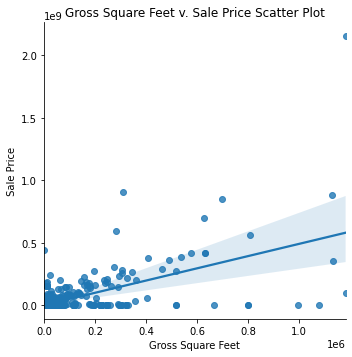

In [215]:
non_zero = df.loc[df[' Sale Price ']>0]
sns.lmplot(x='Gross Square Feet',y=' Sale Price ',data=non_zero,fit_reg=True) 
plt.title('Gross Square Feet v. Sale Price Scatter Plot')
plt.show()

### 10. Which month did the least amount of sales occur

In [216]:
df["Sale Date"] = df["Sale Date"].str.slice(0,2).replace('/','', regex=True)
# Converting the Sale Date column to an int column representing the number month is easier to deal with while using the calendar module
df =df.rename(columns={'Sale Date' : "Month"})
df['Month'] = pd.to_numeric(df['Month'])

In [258]:
for i in df['Month'].value_counts().sort_values().index:
    index_val = df['Month'].value_counts().sort_values().get(i)
    print(calendar.month_abbr[i], ": ", index_val, ' Sales')

Aug :  943  Sales
Feb :  1215  Sales
Nov :  1260  Sales
Mar :  1327  Sales
Jul :  1343  Sales
Sep :  1359  Sales
Jan :  1438  Sales
Apr :  1463  Sales
Oct :  1539  Sales
Dec :  1546  Sales
May :  1667  Sales
Jun :  2059  Sales


Oct-May = 6 Months

Dec-Jun = 6 Months

I don't know if these numbers have anything in common, it's just curious that the top 4 months happen 6 months after every other month.

It seems that most sales happen in the first months of summer, May and June. 

I don't know what else can be concluded by these numbers